 ### スネルの法則
 
 \begin{align}
 \frac{n_1}{n_2} = \frac{\sin \theta_1}{\sin \theta_2} \\
 \end{align}

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import math

In [17]:
def snell(n1, n2, rad1):
    sin2 = math.sin(rad1) * n2 / n1
    if sin2 <= 1.0 and sin2 >= -1.0:
        return math.asin(sin2)
    else:
        return -rad1

In [18]:
# 屈折率n
GLASS_N = 1.333
AIR_N = 1.0

In [35]:
def snell_plot(n1, n2, deg1, plt):
    rad1 = math.radians(deg1)
    rad2 = snell(n1, n2, rad1)
    x = [-math.cos(rad1), 0, math.cos(rad2)]
    y = [math.sin(rad1), 0, -math.sin(rad2)]
    deg2 = math.degrees(rad2)
    text = str(deg1) + " -> " + "{0:.2f}".format(deg2) + "[deg]"
    plt.plot(x, y, "o",label=text)

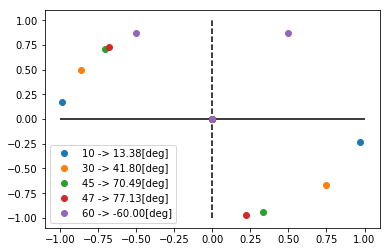

In [36]:
snell_plot(AIR_N, GLASS_N, 10, plt)
snell_plot(AIR_N, GLASS_N, 30, plt)
snell_plot(AIR_N, GLASS_N, 45, plt)
snell_plot(AIR_N, GLASS_N, 47, plt)
snell_plot(AIR_N, GLASS_N, 60, plt)
plt.hlines([0], -1, 1)
plt.vlines([0], -1, 1, linestyles="dashed")
plt.legend()
plt.show()